### Estimating NBD Parameters from Poisson Gamma Mixture

In [1]:
# user inputs
num_obs = 100000
gamma_shape = 2
gamma_rate = 4
nbd_p_derived = 1 / (1+gamma_rate)

In [2]:
# packages
from scipy import stats as st
from scipy.optimize import minimize
import numpy as np
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize

In [3]:
# generate some simulated numbers
x_gamma = st.gamma.rvs(a=gamma_shape, scale=1/gamma_rate, size=num_obs)
x_poisson_gamma_mixture = np.concatenate([st.poisson.rvs(x, size=1) for x in x_gamma])

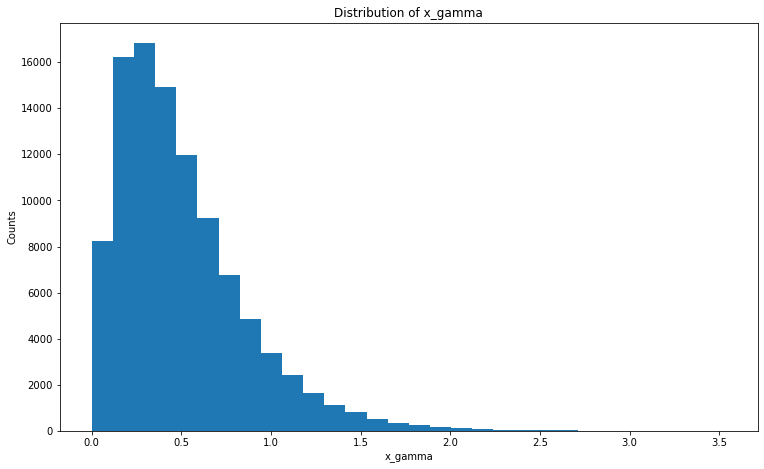

In [4]:
# distribution of x_gamma
figsize(12.5, 7.5)
plt.hist(x_gamma, bins=30)
plt.xlabel("x_gamma")
plt.ylabel("Counts")
plt.title("Distribution of x_gamma")
plt.show()

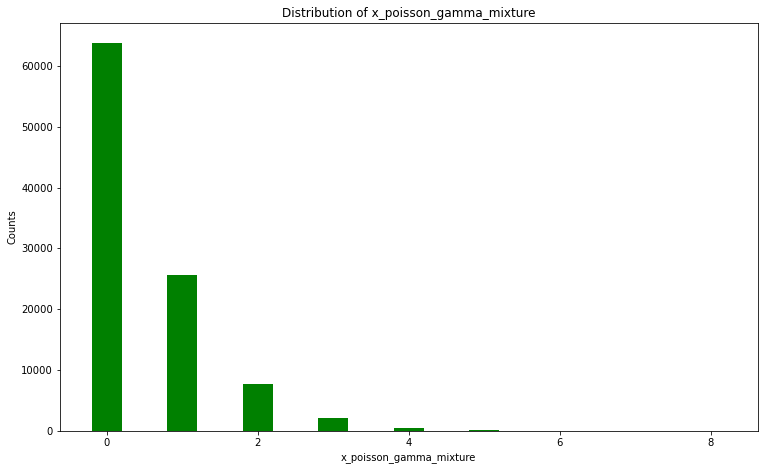

In [5]:
counts = np.bincount(x_poisson_gamma_mixture)
values = np.nonzero(counts)[0]
plt.bar(values, counts[counts!=0], color="green", width=0.4)
plt.xlabel("x_poisson_gamma_mixture")
plt.ylabel("Counts")
plt.title("Distribution of x_poisson_gamma_mixture")
plt.show()

In [6]:
# estimating mle
def nbd_neg_ll(nbd_parameters):
    n, p = nbd_parameters[0], nbd_parameters[1]
    neg_ll = -np.sum(st.nbinom.logpmf(x_poisson_gamma_mixture, n=n, p=p))
    return(neg_ll)

# minimimze
initial_parameters = st.uniform.rvs(size=2)
optimal_result = minimize(nbd_neg_ll, initial_parameters, method="Nelder-Mead", options={"disp":True})
print("Initial n: %f, Initial p: %f" %(optimal_result.x[0], optimal_result.x[1]))
print("Final n: %f, Final p: %f" %(optimal_result.x[0], 1-optimal_result.x[1]))
print("Implied n: %f, Implied p: %f" % (gamma_shape, nbd_p_derived))

Optimization terminated successfully.
         Current function value: 95116.695992
         Iterations: 90
         Function evaluations: 170
Initial n: 2.050528, Initial p: 0.803430
Final n: 2.050528, Final p: 0.196570
Implied n: 2.000000, Implied p: 0.200000
